In [217]:
import scipy as sp
from scipy.spatial.distance import squareform, pdist

# paralelismo..
from multiprocessing import Pool
from multiprocessing.dummy import Pool as ThreadPool 
from functools import partial


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedKFold
import time
import math

# para testes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import zero_one_loss, accuracy_score

# classificador 2.1
import bayes.engineBayesClassifier as bayes

# classificador 2.2
import parzen.parzenFunction as pz

#graficos
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#grafico distribuicao
import scipy.stats as stats
import pylab as pl

from __future__ import division


def lerDados(base):
    if (base == 1):
        dfac = pd.read_csv('dados/mfeat-fac', delim_whitespace=True, header=None)
        return dfac, "mfeat-fac"
    elif (base == 2):
        dfou = pd.read_csv('dados/mfeat-fou', delim_whitespace=True, header=None)
        return dfou, "mfeat-fou"
    elif (base == 3):
        dkar = pd.read_csv('dados/mfeat-kar', delim_whitespace=True, header=None)
        return dkar, "mfeat-kar"

      
#importação dos dados
#dfac = pd.read_csv('dados/mfeat-fac', delim_whitespace=True, header=None)
#dfou = pd.read_csv('dados/mfeat-fou', delim_whitespace=True, header=None)
#dkar = pd.read_csv('dados/mfeat-kar', delim_whitespace=True, header=None)



In [218]:
#cria array com 2000 elementos, onde os 200 primmeiros elementos possuem a classe 0, os proximos 200
#elementos possuem a classe 1, ...
def preparaClasses():
    classes = np.array([])
    for i in range (2000):
        classes = np.append(classes,int(i/200))
    classes[198:203]
    return classes

In [219]:
# ordena a matriz com os dados do array
# número de linhas da matriz deve ser igual ao número de elementos do array
# baseado no tutorial pandas 
# http://nbviewer.jupyter.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/02%20-%20Lesson.ipynb
#def ordenaMatrizPorClasse(matriz,array):
#    c = pd.DataFrame(matriz)
#    c['classe'] = array
#    Sorted = c.sort_values(['classe'], ascending=True)
#    #del Sorted['novacoluna'] # remove a coluna
#    return Sorted

In [220]:
def classificadorJanelaParzen(dadosTreino, classesTreino, dadosTeste, classesTeste):

    treino = np.array(dadosTreino)
    teste = np.array(dadosTeste)
    colunaClasse = dadosTreino.shape[1] - 1
    
    
    treinoClasse0 = treino[ treino[:,colunaClasse] == 0] 
    treinoClasse1 = treino[ treino[:,colunaClasse] == 1] 
    treinoClasse2 = treino[ treino[:,colunaClasse] == 2] 
    treinoClasse3 = treino[ treino[:,colunaClasse] == 3] 
    treinoClasse4 = treino[ treino[:,colunaClasse] == 4] 
    treinoClasse5 = treino[ treino[:,colunaClasse] == 5] 
    treinoClasse6 = treino[ treino[:,colunaClasse] == 6] 
    treinoClasse7 = treino[ treino[:,colunaClasse] == 7] 
    treinoClasse8 = treino[ treino[:,colunaClasse] == 8] 
    treinoClasse9 = treino[ treino[:,colunaClasse] == 9] 
    
    # eliminar a coluna com as classes
    treinoClasse0 = treinoClasse0[:,:colunaClasse]
    treinoClasse1 = treinoClasse1[:,:colunaClasse]
    treinoClasse2 = treinoClasse2[:,:colunaClasse]
    treinoClasse3 = treinoClasse3[:,:colunaClasse]
    treinoClasse4 = treinoClasse4[:,:colunaClasse]
    treinoClasse5 = treinoClasse5[:,:colunaClasse]
    treinoClasse6 = treinoClasse6[:,:colunaClasse]
    treinoClasse7 = treinoClasse7[:,:colunaClasse]
    treinoClasse8 = treinoClasse8[:,:colunaClasse]
    treinoClasse9 = treinoClasse9[:,:colunaClasse]   
       
    acertos = 0
    erros = 0
    
    #print("    > classificando " + str(len(teste)) + " elementos...")
    
    for i in range (len(teste)):
        
        classeCorreta = teste[i][colunaClasse]
        
        # tira a ultima coluna, que é a coluna da classe
        linhaTeste = teste[i, :colunaClasse]    
        
        # classficacao...
        probC0 = pz.parzen(linhaTeste, treinoClasse0)
        probC1 = pz.parzen(linhaTeste, treinoClasse1)
        probC2 = pz.parzen(linhaTeste, treinoClasse2)
        probC3 = pz.parzen(linhaTeste, treinoClasse3)
        probC4 = pz.parzen(linhaTeste, treinoClasse4)
        probC5 = pz.parzen(linhaTeste, treinoClasse5)
        probC6 = pz.parzen(linhaTeste, treinoClasse6)
        probC7 = pz.parzen(linhaTeste, treinoClasse7)
        probC8 = pz.parzen(linhaTeste, treinoClasse8)
        probC9 = pz.parzen(linhaTeste, treinoClasse9)
        
        # verifica qual foi a classificacao
        
        if (probC0 > probC1 and probC0>probC2 and probC0>probC3 and probC0>probC4 and probC0>probC5 and probC0>probC6 and probC0>probC7 and probC0>probC8 and probC0>probC9):
            classeClassificada = 0
        elif (probC1>probC2 and probC1>probC3 and probC1>probC4 and probC1>probC5 and probC1>probC6 and probC1>probC7 and probC1>probC8 and probC1>probC9):
            classeClassificada = 1
        elif (probC2>probC3 and probC2>probC4 and probC2>probC5 and probC2>probC6 and probC2>probC7 and probC2>probC8 and probC2>probC9):
            classeClassificada = 2
        elif (probC3>probC4 and probC3>probC5 and probC3>probC6 and probC3>probC7 and probC3>probC8 and probC3>probC9):
            classeClassificada = 3
        elif (probC4>probC5 and probC4>probC6 and probC4>probC7 and probC4>probC8 and probC4>probC9):
            classeClassificada = 4
        elif (probC5>probC6 and probC5>probC7 and probC5>probC8 and probC5>probC9):
            classeClassificada = 5   
        elif (probC6>probC7 and probC6>probC8 and probC6>probC9):
            classeClassificada = 6
        elif (probC7>probC8 and probC7>probC9):
            classeClassificada = 7  
        elif (probC8>probC9):
            classeClassificada = 8
        else:
            classeClassificada = 9
        
        
        # contabiliza o resultado
        
        if (classeCorreta == classeClassificada):
            acertos = acertos + 1
        else:
            erros = erros + 1
        
    return acertos/(acertos+erros)


In [221]:
def gerarGraficoResultado(nomeDados, resultado, estimativaPontual):
    resultadoOrdenado = np.sort(resultado)
    plt.figure(figsize=(12,7))
    plt.axis([0,300,0,1])
    plt.plot(resultado)
    plt.ylabel("Precisão (accuracy)")
    plt.xlabel("Folds")
    plt.title("Base de dados: " + nomeDados)
    plt.show()
    


In [222]:
# adiciona uma coluna em matrizColuna, referente às classes 
def insereColunaClasses(matriz, classes):
    indiceColunaClasses = len(matriz.columns)
    matriz[indiceColunaClasses] = classes
    return matriz, indiceColunaClasses
    

In [223]:
# embaralha os dados
# encontra 10 folds
# separa treina, classifica e encontra a taxa de acerto 
def core(nomeDados, matrizDados, classes, rodadas=1):

    saida = []
    matrizDados, indiceColunaClasses =  insereColunaClasses(matrizDados.copy(), classes)
    print("[" + nomeDados + "] Número de Rodadas = " + str(rodadas))
    
    
    for i in range(rodadas):
    
        # embaralha a matriz de dados e as classes ao mesmo tempo
        dadosEmbaralhados, classesEmbaralhadas = shuffle(matrizDados, classes, random_state=i)

        # 10 folds
        skf = StratifiedKFold(n_splits=10)
        folds = skf.split(dadosEmbaralhados, classesEmbaralhadas)
        z = 0
        
        for indicesTreino, indicesTeste in folds:        
            
            dadosTreino   = np.array(dadosEmbaralhados.iloc[indicesTreino])
            dadosTeste    = np.array(dadosEmbaralhados.iloc[indicesTeste])          
            classesTreino = np.array(classesEmbaralhadas[indicesTreino])
            classesTeste  = np.array(classesEmbaralhadas[indicesTeste])
            
            # verifica se as classes estao corretas
            for a in range(len(dadosTreino)):
                if (dadosTreino[a][indiceColunaClasses] != classesTreino[a]):
                    print("Erro!")
            for b in range(len(dadosTeste)):
                if (dadosTeste[b][indiceColunaClasses] != classesTeste[b]):
                    print("Erro!")
            
            accuracy = classificadorJanelaParzen(dadosTreino, classesTreino, dadosTeste, classesTeste)
            saida.append(accuracy)          
            print("[" + nomeDados + "] Rodada " + str(i) + ", fold "+ str(z) + " concluido. Accuracy = " + str(accuracy))
            z = z + 1
    
    # ESTIMATIVA PONTUAL
    media = np.mean(saida)       
    return saida, media

In [224]:
# Classifica e mostra o resultado
def preCore(nomeDados, dados, classes, rodadas):
    
    # medir tempo    
    inicio = time.time()
    print("[" + nomeDados + "] Iniciando classificação ")

    # executa a classificação
    resultado, estimativaPontual = core(nomeDados, dados, classes, rodadas)

    # gera o grafico
    gerarGraficoResultado(nomeDados, resultado, estimativaPontual)
    print("[" + str(nomeDados) + "] *** Estimativa Pontual (média) = " + str(estimativaPontual))
    
    # imprime os dados
    print("[" + str(nomeDados) + "] *** Resultados: ")
    print(resultado)
    print("-----------------------")
    
    # calculo do tempo de processamento
    fim = time.time()
    total = fim - inicio
    print("\n[" + nomeDados + "] Fim - Tempo de Execução = " + str(total) + "\n")    
    
    return resultado, estimativaPontual

def iniciaParalelismo(rodadas, base):
    classes = preparaClasses()
    dados, nome = lerDados(base)
    print("inicializando processamento paralelo da matriz '" + str(nome) + "', com dimensões = " + str(dados.shape))
    return preCore(nome, dados, classes, rodadas)


inicializando processamento paralelo da matriz 'mfeat-kar', com dimensões = (2000, 64)
[mfeat-kar] Iniciando classificação 
[mfeat-kar] Número de Rodadas = 30
inicializando processamento paralelo da matriz 'mfeat-fou', com dimensões = (2000, 76)
[mfeat-fou] Iniciando classificação 
[mfeat-fou] Número de Rodadas = 30
inicializando processamento paralelo da matriz 'mfeat-fac', com dimensões = (2000, 216)
[mfeat-fac] Iniciando classificação 
[mfeat-fac] Número de Rodadas = 30
[mfeat-kar] Rodada 0, fold 0 concluido. Accuracy = 0.96
[mfeat-fou] Rodada 0, fold 0 concluido. Accuracy = 0.755
[mfeat-kar] Rodada 0, fold 1 concluido. Accuracy = 0.98
[mfeat-fou] Rodada 0, fold 1 concluido. Accuracy = 0.775
[mfeat-kar] Rodada 0, fold 2 concluido. Accuracy = 0.98
[mfeat-fac] Rodada 0, fold 0 concluido. Accuracy = 0.905
[mfeat-fou] Rodada 0, fold 2 concluido. Accuracy = 0.765
[mfeat-kar] Rodada 0, fold 3 concluido. Accuracy = 0.945
[mfeat-fou] Rodada 0, fold 3 concluido. Accuracy = 0.745
[mfeat-kar] 

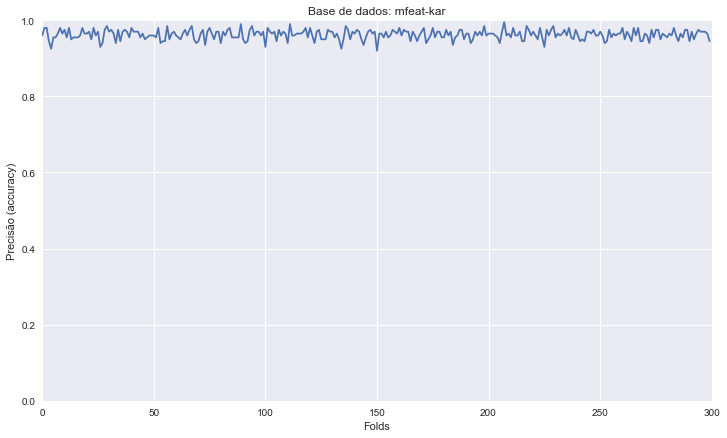

[mfeat-kar] *** Estimativa Pontual (média) = 0.962366666667
[mfeat-kar] *** Resultados: 
[0.96, 0.98, 0.98, 0.945, 0.925, 0.955, 0.955, 0.965, 0.98, 0.965, 0.975, 0.955, 0.98, 0.95, 0.955, 0.955, 0.955, 0.96, 0.98, 0.965, 0.965, 0.97, 0.95, 0.98, 0.96, 0.97, 0.93, 0.94, 0.975, 0.985, 0.97, 0.975, 0.965, 0.94, 0.975, 0.945, 0.97, 0.975, 0.97, 0.955, 0.98, 0.97, 0.97, 0.97, 0.955, 0.965, 0.95, 0.955, 0.96, 0.96, 0.96, 0.955, 0.98, 0.94, 0.945, 0.945, 0.985, 0.95, 0.965, 0.97, 0.96, 0.955, 0.95, 0.965, 0.975, 0.96, 0.975, 0.985, 0.95, 0.94, 0.945, 0.965, 0.975, 0.935, 0.97, 0.98, 0.965, 0.95, 0.97, 0.97, 0.94, 0.97, 0.96, 0.975, 0.98, 0.955, 0.955, 0.955, 0.955, 0.99, 0.95, 0.94, 0.945, 0.975, 0.985, 0.96, 0.97, 0.97, 0.96, 0.97, 0.93, 0.98, 0.97, 0.965, 0.97, 0.945, 0.975, 0.96, 0.97, 0.965, 0.94, 0.99, 0.96, 0.96, 0.965, 0.965, 0.965, 0.97, 0.98, 0.955, 0.98, 0.96, 0.94, 0.97, 0.975, 0.95, 0.95, 0.95, 0.975, 0.97, 0.97, 0.955, 0.965, 0.95, 0.925, 0.95, 0.985, 0.975, 0.95, 0.97, 0.965, 0

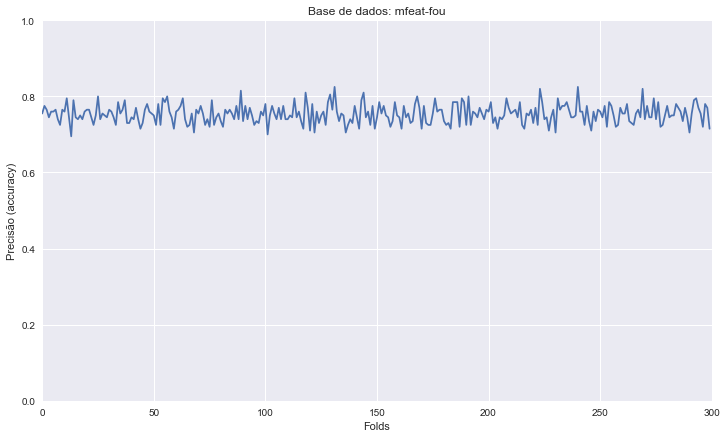

[mfeat-fou] *** Estimativa Pontual (média) = 0.7537
[mfeat-fou] *** Resultados: 
[0.755, 0.775, 0.765, 0.745, 0.76, 0.76, 0.765, 0.74, 0.725, 0.765, 0.76, 0.795, 0.745, 0.695, 0.79, 0.745, 0.74, 0.75, 0.74, 0.76, 0.765, 0.765, 0.745, 0.725, 0.75, 0.8, 0.74, 0.755, 0.75, 0.745, 0.765, 0.76, 0.745, 0.725, 0.785, 0.755, 0.765, 0.79, 0.73, 0.73, 0.745, 0.74, 0.77, 0.74, 0.715, 0.73, 0.765, 0.78, 0.76, 0.755, 0.75, 0.725, 0.78, 0.725, 0.795, 0.785, 0.8, 0.76, 0.745, 0.715, 0.76, 0.765, 0.775, 0.795, 0.74, 0.72, 0.725, 0.755, 0.705, 0.765, 0.755, 0.775, 0.755, 0.725, 0.74, 0.72, 0.79, 0.725, 0.745, 0.755, 0.735, 0.72, 0.765, 0.755, 0.765, 0.755, 0.74, 0.775, 0.74, 0.815, 0.735, 0.775, 0.74, 0.77, 0.75, 0.725, 0.735, 0.73, 0.76, 0.75, 0.78, 0.7, 0.75, 0.775, 0.755, 0.74, 0.77, 0.74, 0.775, 0.74, 0.74, 0.75, 0.745, 0.795, 0.745, 0.76, 0.735, 0.715, 0.81, 0.77, 0.71, 0.78, 0.705, 0.76, 0.73, 0.75, 0.76, 0.725, 0.785, 0.805, 0.765, 0.825, 0.76, 0.735, 0.755, 0.75, 0.705, 0.725, 0.74, 0.73, 0.775

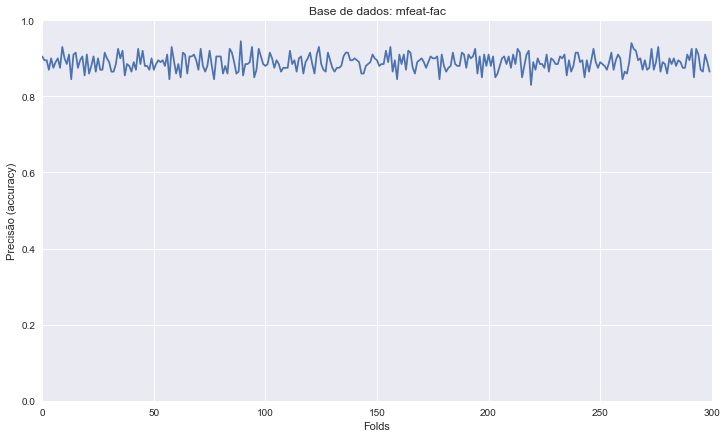

[mfeat-fac] *** Estimativa Pontual (média) = 0.889416666667
[mfeat-fac] *** Resultados: 
[0.905, 0.895, 0.895, 0.87, 0.9, 0.875, 0.89, 0.9, 0.875, 0.93, 0.9, 0.885, 0.91, 0.845, 0.91, 0.915, 0.875, 0.895, 0.905, 0.855, 0.91, 0.86, 0.88, 0.905, 0.865, 0.9, 0.87, 0.87, 0.915, 0.9, 0.89, 0.865, 0.865, 0.885, 0.925, 0.9, 0.92, 0.855, 0.885, 0.88, 0.865, 0.89, 0.87, 0.925, 0.885, 0.92, 0.88, 0.88, 0.87, 0.9, 0.87, 0.885, 0.895, 0.89, 0.895, 0.88, 0.91, 0.845, 0.93, 0.895, 0.86, 0.885, 0.85, 0.915, 0.91, 0.86, 0.905, 0.905, 0.91, 0.895, 0.87, 0.925, 0.88, 0.865, 0.88, 0.92, 0.88, 0.845, 0.905, 0.905, 0.905, 0.86, 0.88, 0.86, 0.925, 0.915, 0.89, 0.86, 0.865, 0.945, 0.855, 0.885, 0.885, 0.89, 0.93, 0.85, 0.87, 0.925, 0.905, 0.885, 0.88, 0.885, 0.915, 0.9, 0.875, 0.895, 0.885, 0.865, 0.875, 0.875, 0.875, 0.92, 0.885, 0.895, 0.865, 0.9, 0.905, 0.86, 0.89, 0.9, 0.915, 0.885, 0.86, 0.91, 0.93, 0.885, 0.87, 0.865, 0.915, 0.895, 0.875, 0.865, 0.875, 0.875, 0.88, 0.905, 0.915, 0.915, 0.895, 0.895, 0.

In [225]:
def main():
    bases = [1,2,3]
    pool = Pool(4)
    rodadas = 30
    func = partial(iniciaParalelismo, rodadas)
    pool.map(func, bases)
    pool.close()
    pool.join()

    
if __name__ == "__main__":
    main()
